In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.io import fits
import h5py
from astropy.table import Table
from batman import TransitParams, TransitModel
from astropy.stats import mad_std
from astropy.constants import R_earth, R_sun
from astropy.time import Time
import sys
sys.path.insert(0, '../../TESSellate/')
from toolkit import LightCurve
from astropy.time import Time

from keras.models import load_model

In [5]:
model = load_model('data/model.hdf5')

In [6]:
koi_table = Table.read('../data/cumulative_2019.07.05_01.52.59.votable')
koi_table.add_index('kepid')

In [53]:
from astropy.stats import sigma_clip

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b''
(22, 2) [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


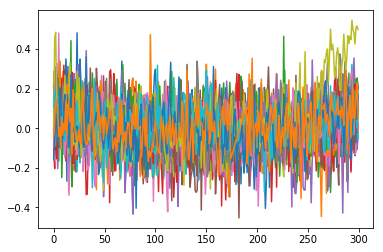

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b'Kepler-489 b'
(18, 2) [False False False False False False False False False False False False
 False False False False False False]


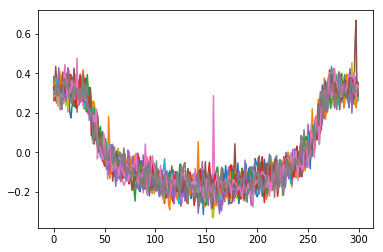

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


kepler_name
-----------
 Kepler-9 c
 Kepler-9 d
 Kepler-9 b
(48, 2) [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


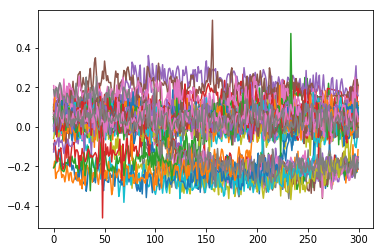

b''
(6, 2) [False False  True  True  True  True]


/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


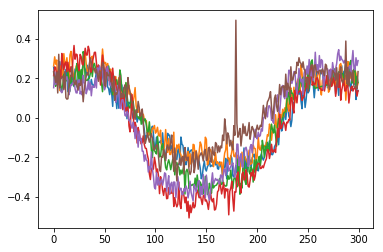

b'Kepler-539 b'
(4, 2) [ True  True  True  True]


/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


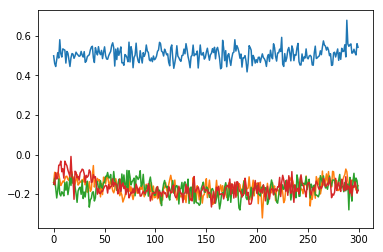

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b'Kepler-491 b'
(70, 2) [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False]


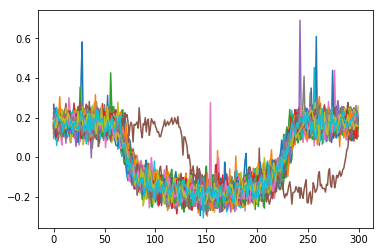

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


kepler_name 
------------
            
Kepler-289 b
Kepler-289 c
(4, 2) [ True  True  True  True]


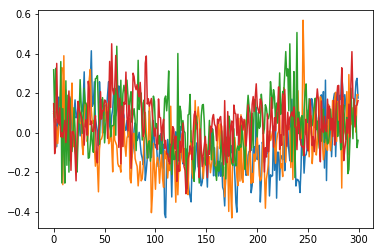

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


kepler_name 
------------
Kepler-210 c
Kepler-210 b
(106, 2) [ True  True  True False False  True False False False  True False  True
  True False  True False False False  True  True False False  True  True
 False False  True False  True False  True False  True False  True  True
  True False  True  True  True False  True False  True  True False  True
  True False  True False  True  True  True  True  True False False  True
  True  True False False  True False  True  True  True False False False
  True False False  True False  True False  True  True False False  True
 False  True False  True False  True  True False False False  True False
  True False False False  True False False  True  True  True]


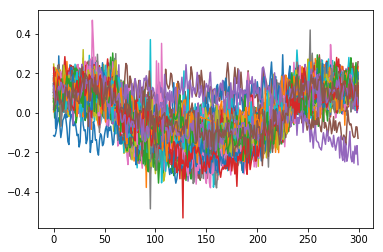

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b'Kepler-77 b'
(106, 2) [False False False False False False False  True False False False False
 False False False False  True False False False False False False False
 False False False False False False False  True False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False]


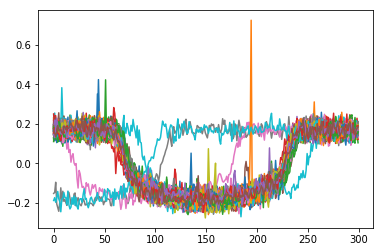

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


kepler_name 
------------
Kepler-111 c
Kepler-111 b
(4, 2) [ True  True  True  True]


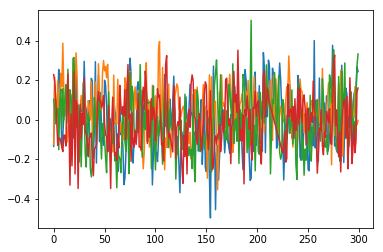

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


kepler_name
-----------
Kepler-18 b
Kepler-18 d
Kepler-18 c
(85, 2) [False False  True False  True False False False False  True False False
 False False False False  True False False False False False False False
 False False False  True False False False  True False  True False False
 False False False False False False  True False  True False False False
 False  True False  True  True False False  True  True False False False
  True  True  True False False False  True False False  True False False
 False False False False False False False False False  True False False
 False]


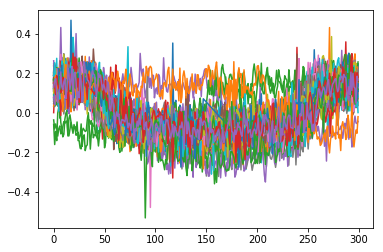

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b'Kepler-422 b'
(132, 2) [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False  True False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False]


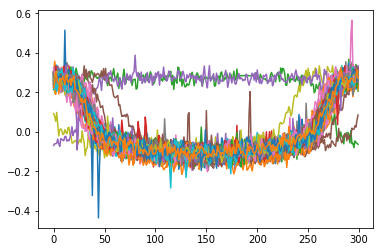

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b''
(50, 2) [False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
  True  True False  True False  True False  True False  True False  True
 False  True]


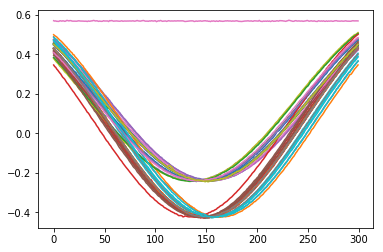

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b''
(33, 2) [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


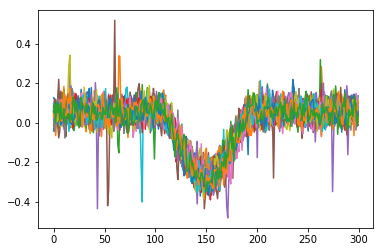

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b'Kepler-17 b'
(586, 2) [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  T

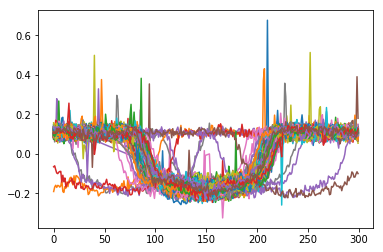

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b'Kepler-3 b'
(205, 2) [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  Tr

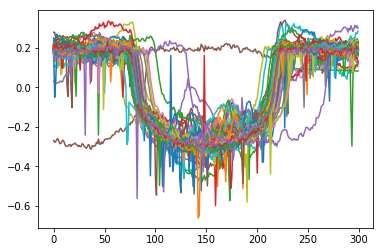

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b'Kepler-6 b'
(220, 2) [False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False Fal

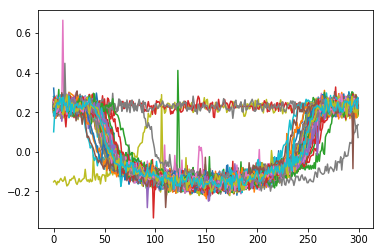

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b'Kepler-15 b'
(78, 2) [False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False  True]


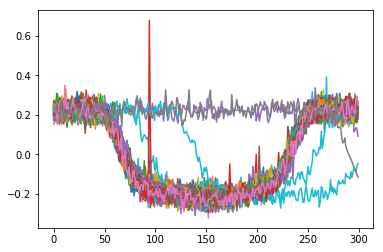

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b'Kepler-1 b'
(434, 2) [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  Tr

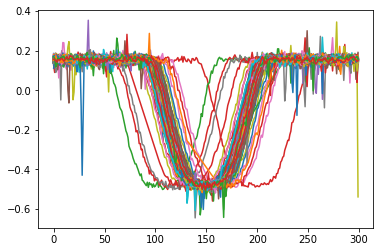

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b'Kepler-468 b'
(13, 2) [False False False False False False False False False False False False
 False]


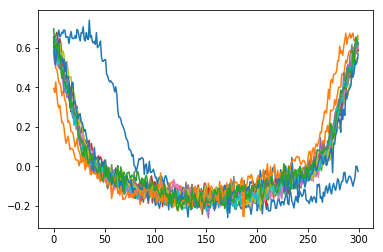

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b'Kepler-63 b'
(135, 2) [False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False  True False False False False False False False
 False False False False  True False False False False False False  True
 False False  True False False False False False False False False False
 False False False  True False False  True  True False  True False False
 False  True False  True False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False  True False False False False False
 False False False]


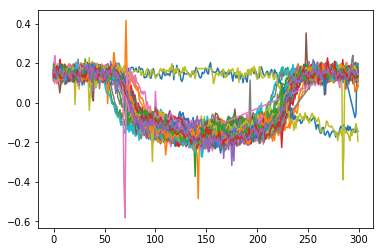

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b'Kepler-12 b'
(167, 2) [False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False  T

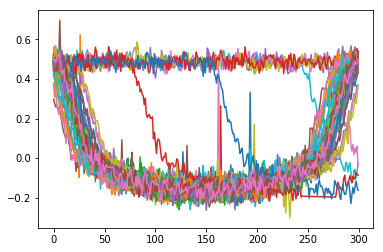

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


kepler_name 
------------
            
Kepler-470 b
(11, 2) [ True  True  True  True  True  True  True  True  True  True  True]


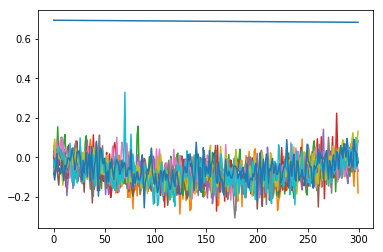

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


b''
(296, 2) [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  

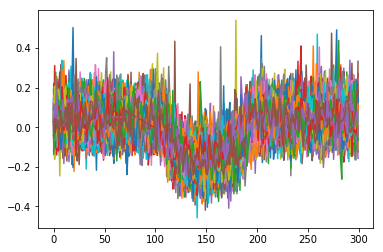

In [64]:
archive = h5py.File('../data/kepler_lcs/archive.hdf5', 'r')

kepids = []
scatter_ratio = []
oot_scatter = []
for kepid in list(archive): 
    if kepid != '001026895' and kepid != '004165496' and kepid != '010676011':  # bad file
        bstr = str(int(kepid)).encode()
        props = koi_table.loc[bstr]
        
        if not isinstance(koi_table.loc[bstr]['kepid'], bytes): 
            props = props[np.argmax(props['koi_depth'])]
        
        period = props['koi_period']
        duration = props['koi_duration'] / 24

        epoch = props['koi_time0bk'] + 2454833 #+ 0.5*duration
        b = props['koi_impact']
        
        params = TransitParams()
        params.per = period
        params.t0 = epoch
        params.duration = duration
        params.rp = float(props['koi_prad']*R_earth/(props['koi_srad']*R_sun)) #(props['koi_depth'] * 1e-6)**0.5
        
        if params.rp > 0.05:

            a = (np.sin(duration * np.pi / period) / np.sqrt((1 + params.rp)**2 - b**2))**-1

            params.a = a
            params.inc = np.degrees(np.arccos(b / params.a))
            params.w = 90
            params.ecc = 0
            params.limb_dark = 'quadratic'
            params.u = [0.5079, 0.2239]

            t, f = archive[kepid][:]
            sort = np.argsort(t)

            t = Time(t[sort], format='jd')
            f = f[sort]

            lc = LightCurve(t, f)
            packed = lc.mask_out_of_transit(params, oot_duration_fraction=1.5)

            if len(packed['times']) > 0:
                transits = LightCurve(**packed).get_transit_light_curves(params)


                if len(transits) > 0:   
                    resampled_transits = []
                    for transit in transits: 
                        transit.remove_polynomial_baseline(params, order=2)
                        midind = len(transit.fluxes)//2
                        if len(transit.fluxes) > 300: 
                            #tr = transit.fluxes[midind-150:midind+150]#[np.newaxis, :, np.newaxis]
                            
#                             tr = np.interp(np.linspace(transit.times.jd.min(), transit.times.jd.max(), 300), 
#                                            transit.times.jd, transit.fluxes)#[np.newaxis, :, np.newaxis]

                            tr = np.interp(np.linspace(-0.1, 0.1, 300), 
                                           transit.times.jd - transit.times.jd.mean(), transit.fluxes)#[np.newaxis, :, np.newaxis]


                            resampled_transits.append(tr)

                    resampled_transits = np.vstack(resampled_transits)[:, :, np.newaxis]
                    resampled_transits = sigma_clip(resampled_transits, sigma=5)
                    resampled_transits[resampled_transits.mask] = np.median(resampled_transits)
                    resampled_transits -= resampled_transits.mean()
                    resampled_transits /= resampled_transits.ptp()
                    
                    pred_y = model.predict(resampled_transits)# , batch_size = 128)

                    if np.any(pred_y): 
                        print(koi_table.loc[bstr]['kepler_name'])
                        print(np.argmax(pred_y, axis=1).astype(bool))
                        plt.plot(resampled_transits[:, :, 0].T)
                        plt.show()
